In [1]:
from Chapter2.CreateDataset import CreateDataset
import pandas as pd
import matplotlib.pyplot as plt
import os
import copy
from util.VisualizeDataset import VisualizeDataset
from util import util

In [2]:
rawdatapath = "data/raw/"
outputpath = "data/intermediate/"

if not os.path.exists(outputpath):
    print("Empty path, so creating..." + outputpath + "...done!")
    os.makedirs(outputpath)

In [3]:
accraw= pd.read_csv(rawdatapath+"Accelerometer_raw.csv")
timecol = "Time (s)"
accfeatures = list()
for col in accraw:
    if (col != timecol) and \
    (col != "Absolute acceleration (m/s^2)"):
        accfeatures.append(col)
accfeatures

['Acceleration x (m/s^2)', 'Acceleration y (m/s^2)', 'Acceleration z (m/s^2)']

In [4]:
gyraw= pd.read_csv(rawdatapath+"Gyroscope_raw.csv")
gyfeatures = list()
for col in gyraw:
    if (col != timecol) and \
    (col != "Absolute (rad/s)"):
        gyfeatures.append(col)
gyfeatures

['Gyroscope x (rad/s)', 'Gyroscope y (rad/s)', 'Gyroscope z (rad/s)']

In [5]:
lightraw= pd.read_csv(rawdatapath+"Light_raw.csv")
lightfeatures = list()
for col in lightraw:
    if (col != timecol):
        lightfeatures.append(col)
lightfeatures

['Illuminance (lx)']

In [6]:
locraw= pd.read_csv(rawdatapath+"Location_raw.csv")
locfeatures = list()
for col in locraw:
    if (col != timecol) and \
    (col != "Satellites"):
        locfeatures.append(col)
locfeatures

['Latitude (°)',
 'Longitude (°)',
 'Altitude (m)',
 'Altitude WGS84 (m)',
 'Speed (m/s)',
 'Direction (°)',
 'Distance (km)',
 'Horizontal Accuracy (m)',
 'Vertical Accuracy (m)']

In [7]:
magraw= pd.read_csv(rawdatapath+"Magnetometer_raw.csv")
magfeatures = list()
for col in magraw:
    if (col != timecol) and \
    (col != "Absolute field (µT)"):
        magfeatures.append(col)
magfeatures

['Magnetic Field x (µT)', 'Magnetic Field y (µT)', 'Magnetic Field z (µT)']

In [8]:
granularities = [60000, 250]
datasets = []

Reading data from Accelerometer.csv
Reading data from Gyroscope.csv
Reading data from Light.csv
Reading data from Location.csv
Reading data from Magnetometer.csv
           acc_Acceleration x (m/s^2) acc_Acceleration y (m/s^2)  \
1970-01-01                  -1.659541                   7.356273   

           acc_Acceleration z (m/s^2)  gyr_Gyroscope x (rad/s)  \
1970-01-01                   6.155604                 0.007182   

            gyr_Gyroscope y (rad/s)  gyr_Gyroscope z (rad/s)  \
1970-01-01                -0.005172                 0.016457   

            lux_Illuminance (lx)  loc_Latitude (°)  loc_Longitude (°)  \
1970-01-01             18.127454         28.688553         115.877784   

            loc_Altitude (m)  loc_Altitude WGS84 (m)  loc_Speed (m/s)  \
1970-01-01         20.029951               15.557466         4.407819   

            loc_Direction (°)  loc_Distance (km)  loc_Horizontal Accuracy (m)  \
1970-01-01          83.960403                NaN                

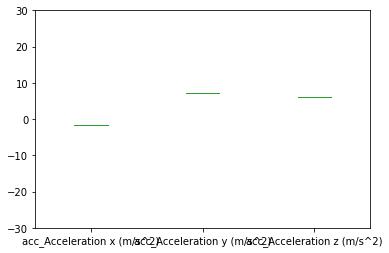

C:\Users\Helia\OneDrive\VU-Cources\Machine-Learning-for-the-Quantified-Self\assignments\ML4QS\assignment01\util\VisualizeDataset.py:106: UserWarning: Attempting to set identical bottom == top == 18.1274535763809 results in singular transformations; automatically expanding.
  max(max_values) + 0.1*(max(max_values) - min(min_values))])


Figure saved to figures\figure_2.png


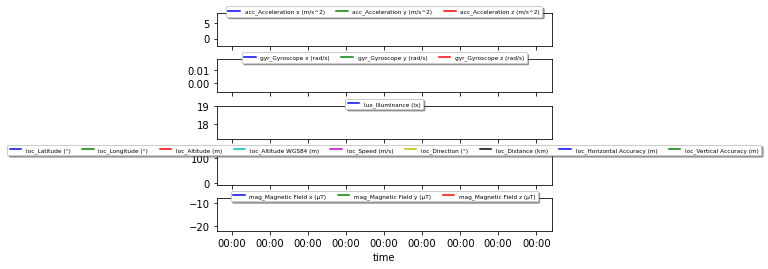

       gyr_Gyroscope x (rad/s)  gyr_Gyroscope y (rad/s)  gyr_Gyroscope z (rad/s)  lux_Illuminance (lx)  loc_Latitude (°)  loc_Longitude (°)  loc_Altitude (m)  loc_Altitude WGS84 (m)  loc_Speed (m/s)  loc_Direction (°)  loc_Distance (km)  loc_Horizontal Accuracy (m)  loc_Vertical Accuracy (m)  mag_Magnetic Field x (µT)  mag_Magnetic Field y (µT)  mag_Magnetic Field z (µT)
count                    1.000                    1.000                    1.000                 1.000             1.000              1.000              1.00                   1.000            1.000               1.00                0.0                        1.000                       1.00                      1.000                      1.000                      1.000
mean                     0.007                   -0.005                    0.016                18.127            28.689            115.878             20.03                  15.557            4.408              83.96                NaN                

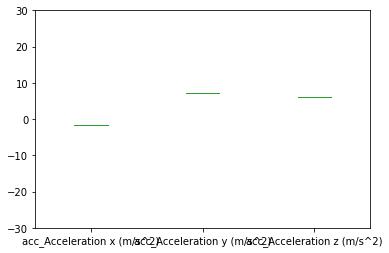

C:\Users\Helia\OneDrive\VU-Cources\Machine-Learning-for-the-Quantified-Self\assignments\ML4QS\assignment01\util\VisualizeDataset.py:106: UserWarning: Attempting to set identical bottom == top == 18.1274535763809 results in singular transformations; automatically expanding.
  max(max_values) + 0.1*(max(max_values) - min(min_values))])


Figure saved to figures\figure_2.png


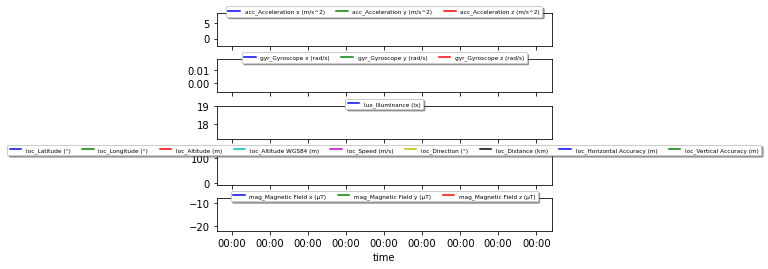

       gyr_Gyroscope x (rad/s)  gyr_Gyroscope y (rad/s)  gyr_Gyroscope z (rad/s)  lux_Illuminance (lx)  loc_Latitude (°)  loc_Longitude (°)  loc_Altitude (m)  loc_Altitude WGS84 (m)  loc_Speed (m/s)  loc_Direction (°)  loc_Distance (km)  loc_Horizontal Accuracy (m)  loc_Vertical Accuracy (m)  mag_Magnetic Field x (µT)  mag_Magnetic Field y (µT)  mag_Magnetic Field z (µT)
count                    1.000                    1.000                    1.000                 1.000             1.000              1.000              1.00                   1.000            1.000               1.00                0.0                        1.000                       1.00                      1.000                      1.000                      1.000
mean                     0.007                   -0.005                    0.016                18.127            28.689            115.878             20.03                  15.557            4.408              83.96                NaN                

In [11]:
for g in granularities:
    
    Dataset = CreateDataset(rawdatapath, g)

    Dataset.add_numerical_dataset("Accelerometer.csv", timecol, accfeatures, "avg", "acc_")

    Dataset.add_numerical_dataset("Gyroscope.csv", timecol, gyfeatures, "avg", "gyr_")
    
    Dataset.add_numerical_dataset("Light.csv", timecol, lightfeatures, "avg", "lux_")
    
    Dataset.add_numerical_dataset("Location.csv", timecol, locfeatures, "avg", "loc_")
    
    Dataset.add_numerical_dataset("Magnetometer.csv", timecol, magfeatures, "avg", "mag_")
    #Dataset = accraw
    dataset = Dataset.data_table
    print(dataset)
    Dataviz = VisualizeDataset()
    
    Dataviz.plot_dataset_boxplot(dataset, ['acc_Acceleration x (m/s^2)', 'acc_Acceleration y (m/s^2)', 'acc_Acceleration z (m/s^2)'])
    #Dataviz.plot_dataset_boxplot(dataset, ['acc_x', 'acc_y', 'acc_z'])
    Dataviz.plot_dataset(dataset, ["acc_", "gyr_", "lux_", "loc_", "mag_"], \
                            ["like", "like", "like", "like", "like"], \
                            ["line", "line", "line", "line", "line"])
    
    util.print_statistics(dataset)
    datasets.append(copy.deepcopy(dataset))

In [10]:
util.print_latex_table_statistics_two_datasets(datasets[0], datasets[1])
dataset.to_csv(outputpath + 'chapter2_result.csv')

attribute, fraction missing values, mean, standard deviation, min, max
acc_Acceleration x (m/s^2) & 0.00  /  0.00 & -1.66  /  -1.66 & nan  /  nan & -1.66  /  -1.66 & -1.66  /  -1.66\\
acc_Acceleration y (m/s^2) & 0.00  /  0.00 & 7.36  /  7.36 & nan  /  nan & 7.36  /  7.36 & 7.36  /  7.36\\
acc_Acceleration z (m/s^2) & 0.00  /  0.00 & 6.16  /  6.16 & nan  /  nan & 6.16  /  6.16 & 6.16  /  6.16\\
gyr_Gyroscope x (rad/s) & 0.00  /  0.00 & 0.01  /  0.01 & nan  /  nan & 0.01  /  0.01 & 0.01  /  0.01\\
gyr_Gyroscope y (rad/s) & 0.00  /  0.00 & -0.01  /  -0.01 & nan  /  nan & -0.01  /  -0.01 & -0.01  /  -0.01\\
gyr_Gyroscope z (rad/s) & 0.00  /  0.00 & 0.02  /  0.02 & nan  /  nan & 0.02  /  0.02 & 0.02  /  0.02\\
lux_Illuminance (lx) & 0.00  /  0.00 & 18.13  /  18.13 & nan  /  nan & 18.13  /  18.13 & 18.13  /  18.13\\
loc_Latitude (°) & 0.00  /  0.00 & 28.69  /  28.69 & nan  /  nan & 28.69  /  28.69 & 28.69  /  28.69\\
loc_Longitude (°) & 0.00  /  0.00 & 115.88  /  115.88 & nan  /  nan & 115.